In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
my_dict={'sale_id':[1,2,3,4,5,6,7,8,9],
         'c_id':[2,2,1,4,2,3,2,3,2],
         'p_id':[3,4,3,2,3,3,2,2,3],
	 'product':['Monitor','CPU','Monitor','RAM','Monitor','Monitor','RAM','RAM','Monitor'],
         'qty':[5,1,3,2,3,2,3,2,2],
         'store':['ABC','DEF','ABC','DEF','ABC','DEF','ABC','DEF','DEF']}
sales = pd.DataFrame(data=my_dict)
sales

,sale_id,c_id,p_id,product,qty,store
0,1,2,3,Monitor,5,ABC
1,2,2,4,CPU,1,DEF
2,3,1,3,Monitor,3,ABC
3,4,4,2,RAM,2,DEF
4,5,2,3,Monitor,3,ABC
5,6,3,3,Monitor,2,DEF
6,7,2,2,RAM,3,ABC
7,8,3,2,RAM,2,DEF
8,9,2,3,Monitor,2,DEF


In [6]:
import pandas as pd
my_dict={'p_id':[1,2,3,4,5,6,7,8],
  'product':['Hard Disk','RAM','Monitor','CPU','Keyboard','Mouse','Motherboard','Power supply'],
  'price':[80,90,75,70,20,10,65,20]}
product = pd.DataFrame(data=my_dict)
product

,p_id,product,price
0,1,Hard Disk,80
1,2,RAM,90
2,3,Monitor,75
3,4,CPU,70
4,5,Keyboard,20
5,6,Mouse,10
6,7,Motherboard,65
7,8,Power supply,20


In [7]:
import pandas as pd
my_dict={'c_id':[1,2,3,4,5,6,7,8],
         'Customer':['Rabi','Raju','Alex','Rani','King','Ronn','Jem','Tom']}
customer = pd.DataFrame(data=my_dict)
customer

,c_id,Customer
0,1,Rabi
1,2,Raju
2,3,Alex
3,4,Rani
4,5,King
5,6,Ronn
6,7,Jem
7,8,Tom


In [27]:
#list of qty sold against each product
display(sales.groupby('product')['qty'].sum())


product
CPU         1
Monitor    15
RAM         7
Name: qty, dtype: int64

In [43]:
#list of qty sold and total revenues (sales $) against each product

# opt 1
#display(sales,product)
sa_pr = sales.merge(product,left_on='product',right_on='product')
sa_pr['rev'] = sa_pr.qty * sa_pr.price
#display(sa_pr)
display(sa_pr.groupby('product')['qty','rev'].sum())


#opt 2
my_sales = sales.groupby('product')['qty'].sum()
my_prd = pd.merge(my_sales,product,on='product')
my_prd['rev'] = my_prd.qty * my_prd.price
display(my_prd)

,qty,rev
product,,
CPU,1,70
Monitor,15,1125
RAM,7,630


,product,qty,p_id,price,rev
0,CPU,1,4,70,70
1,Monitor,15,3,75,1125
2,RAM,7,2,90,630


In [47]:
#list qty sold against each product and againts each store
my_sales = sales.groupby(['product','store'])['qty'].sum()
my_sales


product  store
CPU      DEF       1
Monitor  ABC      11
         DEF       4
RAM      ABC       3
         DEF       4
Name: qty, dtype: int64

In [75]:
#names of product that have not been sold yet (give a list)
s_s = set(sales['product'].values)
s_p = set(product['product'].values)

display(s_s)
display(s_p)

display(s_p - s_s)




{'CPU', 'Monitor', 'RAM'}

{'CPU',
 'Hard Disk',
 'Keyboard',
 'Monitor',
 'Motherboard',
 'Mouse',
 'Power supply',
 'RAM'}

{'Hard Disk', 'Keyboard', 'Motherboard', 'Mouse', 'Power supply'}

In [82]:
#list of customers who havent purchased anythong
#display(customer,sales)
my_data = pd.merge(sales,customer,on='c_id')
display(my_data)

display(set(customer.Customer) - set(my_data.Customer))


,sale_id,c_id,p_id,product,qty,store,Customer
0,1,2,3,Monitor,5,ABC,Raju
1,2,2,4,CPU,1,DEF,Raju
2,5,2,3,Monitor,3,ABC,Raju
3,7,2,2,RAM,3,ABC,Raju
4,9,2,3,Monitor,2,DEF,Raju
5,3,1,3,Monitor,3,ABC,Rabi
6,4,4,2,RAM,2,DEF,Rani
7,6,3,3,Monitor,2,DEF,Alex
8,8,3,2,RAM,2,DEF,Alex


{'Jem', 'King', 'Ronn', 'Tom'}

In [92]:
#most spendful client
display(sales.head(2),product.head(2))
my_data = pd.merge(sales,customer,on='c_id')
my_data_price = pd.merge(my_data,product,on='p_id')
my_data_price['exp'] = my_data_price.qty * my_data_price.price
my_data_price.groupby('Customer')['exp'].sum()


,sale_id,c_id,p_id,product,qty,store
0,1,2,3,Monitor,5,ABC
1,2,2,4,CPU,1,DEF


,p_id,product,price
0,1,Hard Disk,80
1,2,RAM,90


Customer
Alex     330
Rabi     225
Raju    1090
Rani     180
Name: exp, dtype: int64

In [98]:
#buisest store (by visits)
display(my_data_price.groupby('store').size())
my_data_price.store.value_counts()

store
ABC    4
DEF    5
dtype: int64

DEF    5
ABC    4
Name: store, dtype: int64

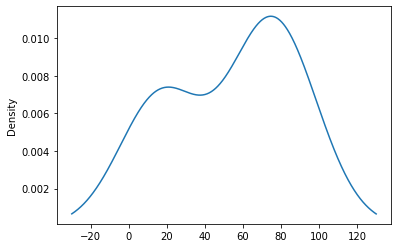

In [101]:
#kde of prices of products
product.price.plot.kde()
